## Example code: Create a gRNA expression plasmid
pX330 serves as a standard gRNA expression backbone plasmid. A gRNA spacer can simply be cloned into a BbsI-digested destination site of pX330 as follows:
1. Generate QUEEN object for a sticky-ended gRNA spacer dsDNA,
2. Digest pX330 by BbsI, and
3. Assemble the spacer with the BbsI-digested pX330.

In [1]:
import sys
sys.path.append("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github")
from QUEEN.queen import * 
from QUEEN import cutsite as cs
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

<Figure size 72x72 with 0 Axes>

In [1]:
px330       = QUEEN(record="https://benchling.com/s/seq-U4pePb09KHutQzjyOPQV", dbtype="benchling", product="px330")
gRNA_top    = QUEEN(seq="CACCGACCATTGTTCAATATCGTCC", ssdna=True)
gRNA_bottom = QUEEN(seq="AAACGGACGATATTGAACAATGGTC", ssdna=True)
gRNA        = joindna(gRNA_top, gRNA_bottom, supfeature={"feature_id":"gRNA-1", "feature_type":"gRNA", "qualifier:label":"gRNA"})
sites       = px330.searchsequence(cs.lib["BbsI"])
fragments   = cutdna(px330, *sites)
backbone    = fragments[0] if len(fragments[0].seq) > len(fragments[1].seq) else fragment[1]
pgRNA       = joindna(gRNA, backbone, topology="circular", product="pgRNA")
gRNA.printsequence(display=True)
pgRNA.printfeature()

5' CACCGACCATTGTTCAATATCGTCC---- 3'
3' ----CTGGTAACAAGTTATAGCAGGCAAA 5'

feature_id  feature_type   qualifier:label     start  end   strand  
0           primer_bind    hU6-F               0      21    +       
100         promoter       U6 promoter         0      241   +       
200         source         source              0      249   +       
300         primer_bind    LKO.1 5'            171    191   +       
gRNA-1      gRNA           gRNA                245    274   +       
500         misc_RNA       gRNA scaffold       270    346   +       
600         source         source              270    8487  +       
700         enhancer       CMV enhancer        442    728   +       
800         intron         hybrid intron       986    1214  +       
900         regulatory     Kozak sequence      1225   1235  +       
1000        CDS            3xFLAG              1234   1300  +       
1100        CDS            SV40 NLS            1306   1327  +       
1200        CDS            Cas

<Figure size 72x72 with 0 Axes>

## Example code: pCMV-Target-AID construction
QUEEN script for pCMV-Target-AID construction.
1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129.
2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046.
3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048.
4. The three fragments were assembled by Gibson Assembly.

In [2]:
#Load plasmid genbank files from the benchling URLs.
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")           #Load pCMV-ABE plasmid object.
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID") #Load pCDNA3.1-Target-AID plasmid object. 

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [3]:
processname1 = "PCR"
description1 = "1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129."
QUEEN("GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG",   supfeature={"feature_type":"primer_bind", "qualifier:label":"RS045"}, product="RS045") #Create a QUEEN object for the forward primer.   
QUEEN("CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", supfeature={"feature_type":"primer_bind", "qualifier:label":"HM129"}, product="HM129") #Create a QUEEN object for the reverse primer. 
pcDNA31_Target_AID.searchsequence(RS045.seq[-18:], product="FW1", pn=processname1, pd=description1)                                 #Search for the 18-bp 3’-end sequences of the forward primer.
pcDNA31_Target_AID.searchsequence(HM129.seq[-18:], product="RV1", pn=processname1, pd=description1)                                 #Search for the 18-bp 3’-end sequences of the forward primer.
cropdna(pcDNA31_Target_AID, FW1[0].end, RV1[0].start, product="extract1", pn=processname1, pd=description1)                         #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract1, RS045.seq, HM129.rcseq, supfeature={"feature_id":"f1", "qualifier:label":"fragment-1"}, product="fragment1", pn=processname1, pd=description1) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment1', length='2596 bp', topology='linear'>

In [4]:
processname2 = "PCR"
description2 = "2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC",  supfeature={"feature_type":"primer_bind", "qualifier:label":"HM128"}, product="HM128") #Create a QUEEN object for the forward primer. 
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", supfeature={"feature_type":"primer_bind", "qualifier:label":"RS046"}, product="RS046") #Create a QUEEN object for the reverse primer.
pcDNA31_Target_AID.searchsequence(HM128.seq[-18:], product="FW2", pn=processname2, pd=description2)                                      #Search for the 18-bp 3’-end sequences of the forward primer.
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV2", pn=processname2, pd=description2)                                      #Search for the 18-bp 3’-end sequences of the forward primer.
f2 = cropdna(pcDNA31_Target_AID, FW2[0].end, RV2[0].start, product="extract2", pn=processname2, pd=description2)                         #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract2, HM128.seq, RS046.rcseq, supfeature={"feature_id":"f2", "qualifier:label":"fragment-2"}, product="fragment2", pn=processname2, pd=description2) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment2', length='2831 bp', topology='linear'>

In [5]:
processname3 = "PCR"
description3 = "3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048."
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", supfeature={"feature_type":"primer_bind", "qualifier:label":"RS047"}, product="RS047") #Create a QUEEN object for the forward primer. 
QUEEN("CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", supfeature={"feature_type":"primer_bind", "qualifier:label":"RS048"}, product="RS048")    #Create a QUEEN object for the reverse primer.
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", pn=processname3, pd=description3)                                           #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", pn=processname3, pd=description3)                                           #Search for the 18-bp 3’-end sequences of the forward primer.
f3 = cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="extract3", pn=processname3, pd=description3)                              #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract3, RS047.seq, RS048.rcseq, supfeature={"feature_id":"f3", "qualifier:label":"fragment-3"}, product="fragment3", pn=processname3, pd=description3) #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment3', length='3403 bp', topology='linear'>

In [6]:
processname4 = "Gibson Assembly"
description4 = "4. The three fragments were assembled by Gibson Assembly."
modifyends(fragment1, "*{30}/-{30}","-{30}/*{30}", product="fragment1_mod", pn=processname4, pd=description4)
modifyends(fragment2, "*{30}/-{30}","-{30}/*{30}", product="fragment2_mod", pn=processname4, pd=description4)
modifyends(fragment3, "*{30}/-{30}","-{30}/*{30}", product="fragment3_mod", pn=processname4, pd=description4)
joindna(fragment1_mod, fragment2_mod, fragment3_mod, topology="circular", product="pCMV_Target_AID", pn=processname4, pd=description4)

<queen.QUEEN object; project='pCMV_Target_AID', length='8752 bp', topology='circular'>

In [7]:
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
0           source        source              0      3308  +       
100         primer_bind   M13 Reverse         275    292   -       
200         primer_bind   M13/pUC Reverse     288    311   -       
300         protein_bind  lac operator        299    316   +       
400         promoter      lac promoter        323    354   -       
500         protein_bind  CAP binding site    368    390   +       
600         primer_bind   L4440               506    524   -       
700         rep_origin    ori                 677    1266  -       
800         primer_bind   pBR322ori-F         757    777   -       
900         CDS           AmpR                1436   2297  -       
1000        primer_bind   Amp-R               2059   2079  +       
1100        promoter      AmpR promoter       2297   2402  -       
1200        primer_bind   pRS-marker          2480   2500  -       
1300        enhancer      CMV enhancer        26

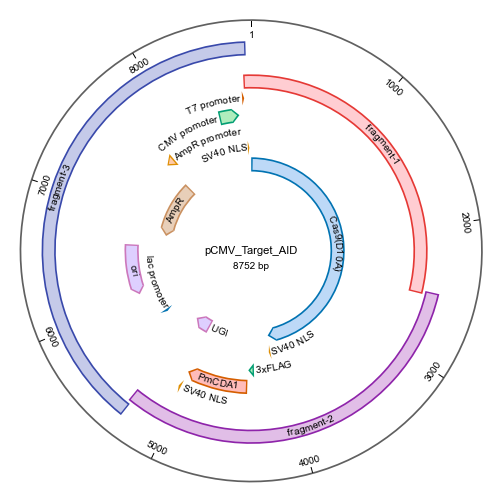

In [8]:
#The color_sets for the sequence features of the fragments used in the Gibson assembly. 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]

def set_fragment_color (dna, fragment_id, color_set):
    dna = editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]))
    dna = editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]))
    dna = editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0))
    return dna 

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project)
    return fig, plasmid

pCMV_Target_AID = set_fragment_color(pCMV_Target_AID, "1", color_sets[0])
pCMV_Target_AID = set_fragment_color(pCMV_Target_AID, "2", color_sets[1])
pCMV_Target_AID = set_fragment_color(pCMV_Target_AID, "3", color_sets[2])
fig0, plasmid = visualization(pCMV_Target_AID)
fig0.savefig()

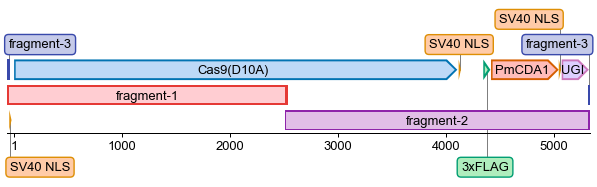

In [10]:
features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="qualifier:label", query="fragment")
#features = None
fig1      = visualizemap(plasmid, start=8688, end=5335, feature_list=features, width_scale=0.5, tick_interval=1000, title="", fontsize=13, height_scale=1.05)
fig1.savefig("output/fig1.pdf")

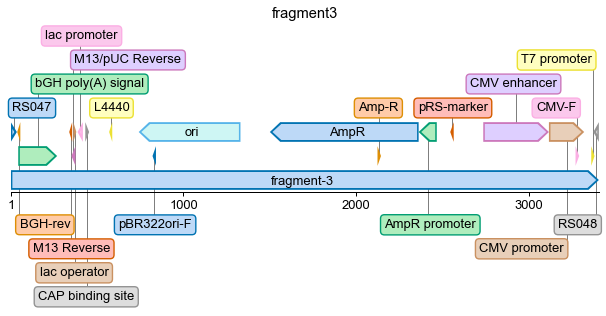

In [11]:
fig2 = visualizemap(fragment3, tick_interval=1000, width_scale=0.8, fontsize=13)
fig2.savefig()

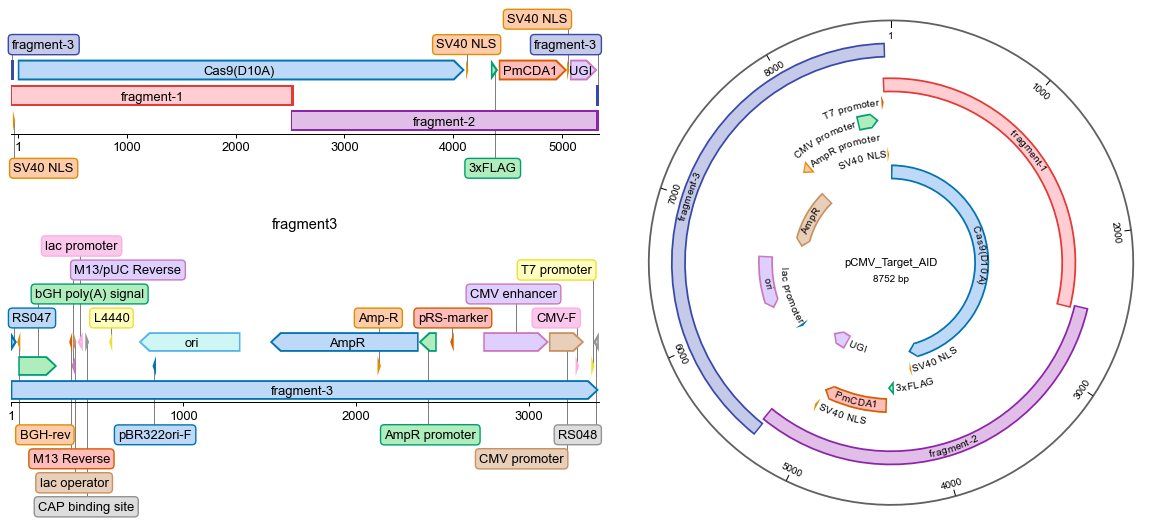

In [12]:
((fig1/fig2)|fig0).savefig()

In [13]:
pCMV_Target_AID.outputgbk("output/pCMV-Target-AID.gbk")

In [14]:
quine(pCMV_Target_AID, process_description=True)

1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129.
2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046.
3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048.
4. The three fragments were assembled by Gibson Assembly.
